# Monte Carlo Integration 

Problem: Solve the following integrals

1. $$ \int_{1}^{3} x^3 dx $$

2. $$ \int_{0}^{\infty} exp(x^2) dx $$

3. $$I=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^{4}e^{-\frac{x^2}{2}}$$

# Objectives
At the end of this project:
1. Find the exact solution of the above using SciPy
2. Use the Monte-Carlo methods of integration to find the solutions to the above integrals.
3. Understand the Important of Sampling Method. 

# Introduction
A standard problem in mathematics is that; not all integrals have closed form solutions i.e. can be solved using mathematical methods of integration. As a result scientist have come up with alternative methods of finding the solution to an integral problem. In this question we are going to find the solutions to integral problems of the form $I=\int_{0}^{1}f(x)$ using Monte Carlo Simulation procedure below:

1. Generate $n$ independent and identically distributed samples $U_1,U_2,U_3,...U_n$ from  $U(0,1)$ 
2. Compute $f(U_i)$ for $i=1,2,...,n$ (N.B. $f(U_i)'s$ are also independent and identically distributed with mean)
3. Then by the law of large numbers it follows that:
$$ 
\sum_{i=1}^{n} \frac{f(U_i)}{n} \rightarrow I
$$
when $n\rightarrow \infty$
                
N.B: The idea here is to try and covert our problem to this form $I=\int_{0}^{1}f(x)$ all the time.

The first two problems will follow this algorithm. We begin by defining our functions and setting seed. 

In [28]:
import numpy as np
from numpy import *
from scipy import stats
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tabulate import tabulate

In [1]:

def func(x):
    return (x**3)
def func1(x):
    return(exp(-x**2))
def func2(x):
    return(x**4/sqrt(2*pi)*exp(-x**2/2))

def monte_carlo(func,
                a=1,
                b=3,
                n=1000):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)
    u_func = func(((b-a)*u)+a)
    s = ((b-a)/n)*u_func.sum()
    
    return s

def monte_carlo1(func1,
                a=0,
                b=1,
                n=1000):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)
    u_func1 = func1(-1+1/u)/u**2
    s1 = (u_func1.sum())/n
    
    return s1


We will then proceed to solve for the exact solutions to our integral problems (i.e. using SciPy library) and compare them to  our numerical approach (i.e. Monte Carlo).

In [4]:
I = quad(func, 1, 3)
I1 =quad(func1,0,float(inf))
I2=quad(func2,float(-inf),float(+inf))

In [7]:
I

(20.000000000000004, 2.2204460492503136e-13)

In [8]:
I1

(0.8862269254527579, 7.101318529726462e-09)

In [9]:
I2

(3.0000000000000053, 1.2043243406178032e-08)

For the third problem we are going to use our understanding of statistics to determine the numerical solution of our integral.
$$I=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^{4}e^{-\frac{x^2}{2}}$$
Equation 1 can be written as

$$ I=\int_{-\infty}^{\infty}x^{4} f(x), 
$$

where $f(x)= \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}} \sim N(0,1)$ and  $\phi(x)= x^4$

Then it follows that $I$ can be expressed as
$$I=E(\phi(x)) $$
$$ E(\phi(x))\approx \frac{\sum_{i=1}^{n}\phi(x_i)}{n}$$
By transforming our integral problem to an expectation problem we can now follow the monte-carlo simulation steps to find the numerical solution to our problem. The steps are given below:
1. Generate $n$ independent and identically distributed samples $x_1,x_2,x_3,...x_n$ from  $N(0,1)$ 

2. Compute $\phi(x_i)$ for $i=1,2,...,n$  ( N.B. $\phi(x_i)'s$ are also independent and identically distributed)

3. Then by the law of large numbers it follows that:$$ \sum_{i=1}^{n} \frac{\phi(x_i)}{n} \rightarrow I$$


In [5]:
def monte_carlo2(func2,
                a=float(-inf),
                b=float(inf),
                n=1000):
    """
    Monte Carlo integration
    """
    
    u = np.random.standard_normal(size=n)
    u_func2 = u**4
    s2 = (u_func2.sum())/n
    
    return s2

The code below shows the monte carlo and exact solutions to our integrals for $n= 1000$

In [6]:
monte_carlo(func,1,3,1000)

19.482562196139963

In [11]:
monte_carlo1(func1,0,1,1000)

0.9104735892857159

In [12]:
monte_carlo2(func1,-inf,inf,1000)

2.805074417930706

Now let us consider the case where the sample size varies. We are going to simulate the same integral for a range of sampling density and plot the result on top of the  exact solution.

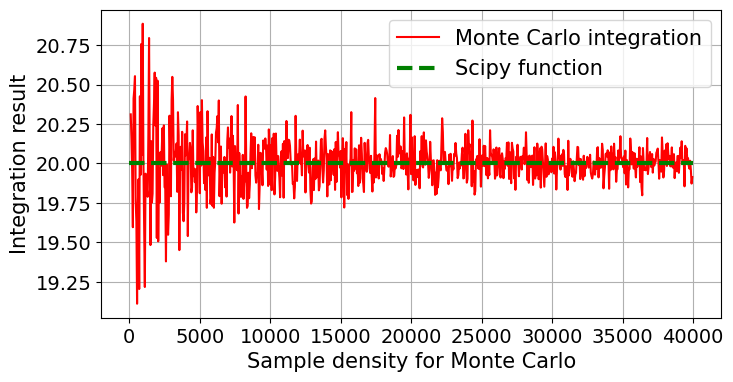

In [18]:
inte_lst = []
for i in range(100,40000,50):
    inte = monte_carlo(func,a=1,b=3,n=i)
    inte_lst.append(inte)

plt.figure(figsize=(8,4))
plt.plot([i for i in range(100,40000,50)],inte_lst,color='red')
plt.hlines(y=I[0],xmin=0,xmax=40000,linestyle='--',lw=3,colors='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sample density for Monte Carlo",fontsize=15)
plt.ylabel("Integration result",fontsize=15)
plt.grid(True)
plt.legend(['Monte Carlo integration','Scipy function'],fontsize=15)
plt.show()


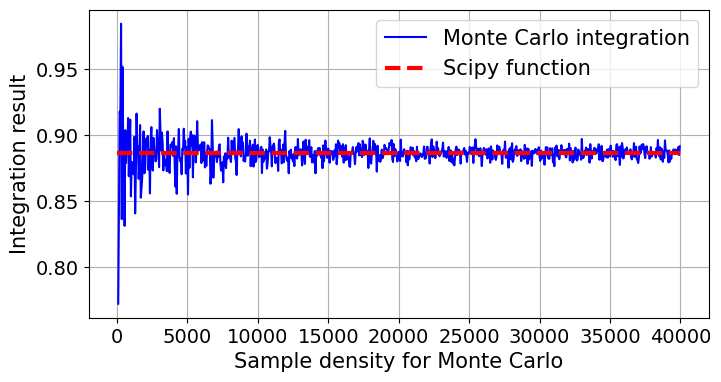

In [20]:
inte_lst1 = []
for i in range(100,40000,50):
    inte1 = monte_carlo1(func1,a=0,b=1,n=i)
    inte_lst1.append(inte1)

plt.figure(figsize=(8,4))
plt.plot([i for i in range(100,40000,50)],inte_lst1,color='blue')
plt.hlines(y=I1[0],xmin=0,xmax=40000,linestyle='--',lw=3,colors='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sample density for Monte Carlo",fontsize=15)
plt.ylabel("Integration result",fontsize=15)
plt.grid(True)
plt.legend(['Monte Carlo integration','Scipy function'],fontsize=15)
plt.show()


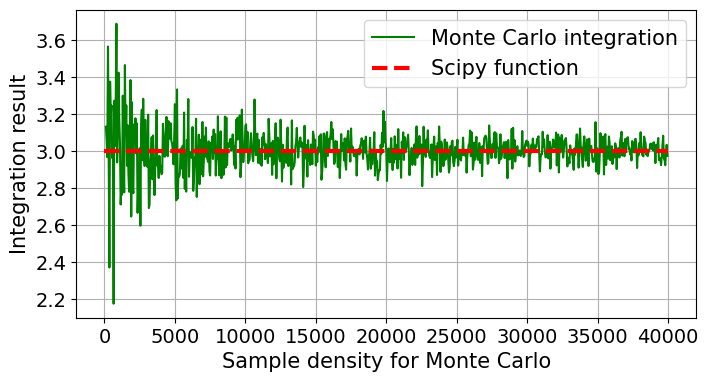

In [23]:
inte_lst2 = []
for i in range(100,40000,50):
    inte2 = monte_carlo2(func2,a=-inf,b=inf,n=i)
    inte_lst2.append(inte2)

plt.figure(figsize=(8,4))
plt.plot([i for i in range(100,40000,50)],inte_lst2,color='green')
plt.hlines(y=I2[0],xmin=0,xmax=40000,linestyle='--',lw=3,colors='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sample density for Monte Carlo",fontsize=15)
plt.ylabel("Integration result",fontsize=15)
plt.grid(True)
plt.legend(['Monte Carlo integration','Scipy function'],fontsize=15)
plt.show()


We observe that for the three plots above, there are many disturbances for small sample size (i.e., in the region of $n=0$ to $n=5000$), but they smooth out as the sample size increases and converges to the same values we got from the SciPy integration function. 


# Important of Sampling Method

Below we introduced another method for Monte Carlo integration called Importance Sampling. The main reason for this approach is to try and reduce the variance of our estimate by introducing a constant into our integral. This is demonstrated below:

$$I=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^{4}e^{-\frac{x^2}{2}} (1)$$    
$$I=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^{4}e^{-\frac{x^2}{2}}\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}\frac{1}{\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}} (2)$$
Now we transform (2) to (3) under monte carlo integration
$$I=\int_{-\infty}^{\infty}\frac{\frac{1}{\sqrt{2\pi}}x^{4}e^{-\frac{x^2}{2}}}{\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}}\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}(3)$$
where $\phi(x)=\frac{\frac{1}{\sqrt{2\pi}}x^{4}e^{-\frac{x^2}{2}}}{\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}}$ and $f(x)=\frac{e^\frac{-x^2}{1.15^2}}{\sqrt{2\pi 1.15^2}}$

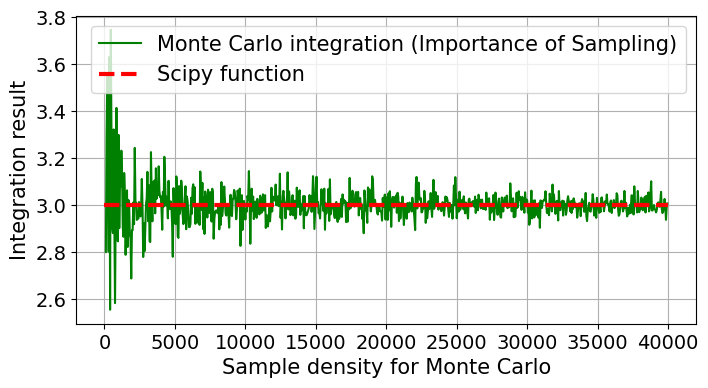

In [26]:
def monte_carlo3(func2,
                a=float(-inf),
                b=float(inf),
                n=1000):
    """
    Monte Carlo integration
    """
    
    u1 = np.random.normal(0,1.15,size=n)
    u_func3 = (func2(u1))/norm.pdf(u1,0,1.15)
    s3 = (u_func3.sum())/n
    return s3

inte_lst3 = []
for i in range(100,40000,50):
    inte3 = monte_carlo3(func2,a=-inf,b=inf,n=i)
    inte_lst3.append(inte3)

plt.figure(figsize=(8,4))
plt.plot([i for i in range(100,40000,50)],inte_lst3,color='green')
plt.hlines(y=I2[0],xmin=0,xmax=40000,linestyle='--',lw=3,colors='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sample density for Monte Carlo",fontsize=15)
plt.ylabel("Integration result",fontsize=15)
plt.grid(True)
plt.legend(['Monte Carlo integration (Importance of Sampling)','Scipy function'],fontsize=15)
plt.show()


In [27]:
var(inte_lst2), var(inte_lst3)

(0.01134647877046049, 0.005874742062591625)

# Conclusion
The Importance of Sampling method has a lower variance (0.00587) than the general approach method we used in solving this problem. The importance of sampling approach is another form of monte carlo integration method and can be used on our other two problems as well.
The graph also depicts that the variations or spikes in this method are much lower than that in the plot directly above it.  

In conclusion, we showed that the Monte-Carlo method of integration is a good method to use when solving integrals with no close-form solution.


- Paul Glasserman (2004), Monte Carlo Methods in Financial Engineering